### El látigo y las ondas de choque

1. Considere primero el caso de una cuerda con la misma *masa por unidad de longitud* a la cual se le imprime un pulso en uno de sus extremos y el otro extremo está fijo. Calcular la velocidad y el desplazamiento del otro extremo. Para darse una idea puede utilizar alguno de los simuladores que hay disponibles en la red. El de la Universidad de Colorado es particularmente bueno.


$$ \frac{\partial^2 y}{\partial x^2} = \frac{1}{v^2} \frac{\partial^2 y}{\partial t^2}$$

### Model Assumption

$$  Y(x, t) = X(x)\cdot T(t) $$


#### Spatial Equation


$$ \frac{\partial^2 }{\partial x^2} X(x) = kX(x) $$

**System of first order equation**


$$ \frac{\partial }{\partial x} X(x) = U(x) $$

$$ \frac{\partial}{\partial x} U(x) = kX(x) $$

$$  $$


### Temporal Equation

$$ \frac{\partial^2 }{\partial x^2} T(x) = kT(x)v^2 $$


**System of first order equation**


$$ \frac{\partial }{\partial x} T(t) = U(t) $$

$$ \frac{\partial}{\partial x} U(t) = kT(t)v^2 $$



Para la parte de x: solucionarla con una estrategia que contemple las condiciones de frontera

source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html


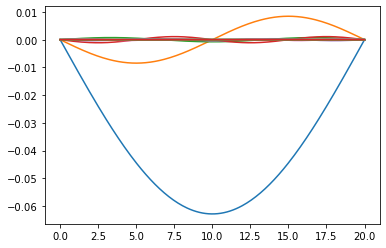

In [38]:
from scipy.integrate import odeint, solve_bvp, solve_ivp
import numpy as np 
import math

L = 20
n = 1
# k = n*math.pi/L
v = 1

def Xfun(x, y, n):
    k = n*math.pi/L
    X, u = y
    dXdx = [u, (-k**2)*X ]
    return dXdx

def Tfun(x, y, n):
    k = n*math.pi/L
    T, u = y
    dTdt = [u, (-k**2)*T*v**2 ]
    return dTdt

def bc(ya, yb):
    return [ ya[0],  yb[0]]

def g(x):

    if x < L/4:
        return (4*v*x)/L 
    
    if x < L/2:
        return (4*v*( (L/2) - x ))/L
    
    return 0

n_points = 200
x = np.linspace(0, L, n_points)
y_guess = np.zeros( (2, x.size) )
y_guess[0] = np.array( [g(xi) for xi in x ])

import matplotlib.pyplot as plt 
solgen = np.zeros(n_points)

for n in range(1, 25):
    Xfunn = lambda x, y: Xfun(x, y, n)
    res_x = solve_bvp(Xfunn, bc, x, y_guess)
    sol_part =  res_x.sol(x)[0]
    solgen = solgen + sol_part
    plt.plot( x,  sol_part)

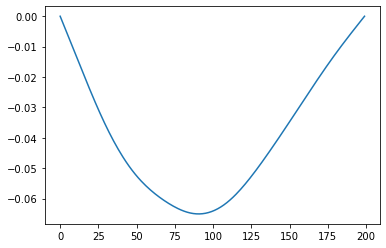

In [39]:
plt.plot(solgen)

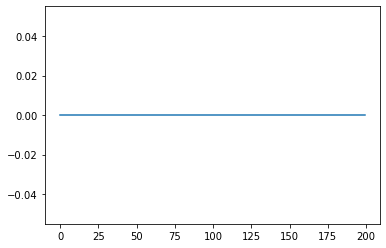

In [40]:
plt.plot(y_guess[1])